In [1]:
import tensorflow as tf
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
print("TensorFlow version:", tf.__version__)
tf.enable_eager_execution()

TensorFlow version: 1.15.0



In [2]:
from math import isclose

def _exp_map(H):
        epsilon = 1e-6
        # H.shape: batch x n-1 x k
        n_minus_1 = int(H.shape[-2])
        zero_row = tf.zeros((1,n_minus_1))        # 1 x n-1
        I = tf.eye(n_minus_1)                     # n-1 x n-1
        zero_I = tf.concat((zero_row, I), axis=0) # n x n-1

        v_mat = tf.matmul(zero_I, H)                  # batch x n x k
        v_norm_vec = tf.linalg.norm(v_mat,axis=1)     # batch x k
        v_norm_row_vec = tf.expand_dims(v_norm_vec,1) # batch x 1 x k
        v_norm_diag = tf.linalg.diag(v_norm_vec)      # batch x k x k
        inv_v_norm_diag = tf.linalg.diag(1/(v_norm_vec+epsilon))
        sin_over_norm = tf.linalg.matmul(tf.math.sin(v_norm_diag),inv_v_norm_diag) # batch x k x k

        e1 = tf.eye(n_minus_1+1,1) # n x 1

        cos_term = tf.linalg.matmul(e1, tf.math.cos(v_norm_row_vec))
        sin_term = tf.linalg.matmul(v_mat, sin_over_norm)

        exp_mapped_vs = cos_term+sin_term

        assert isclose(tf.linalg.norm(exp_mapped_vs[0,:,0]),1, abs_tol=1e-6)

        return exp_mapped_vs

In [3]:
H = tf.random.uniform(shape=[1,6,3],minval=-10,maxval=10)

2022-09-11 11:43:24.989472: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-09-11 11:43:25.009940: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3392355000 Hz
2022-09-11 11:43:25.010229: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55fbdf517100 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-09-11 11:43:25.010242: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [4]:
out = _exp_map(H)
print(out)
print(tf.linalg.norm(out,axis=1))

tf.Tensor(
[[[ 0.35922676  0.40554225  0.91560286]
  [-0.38021144  0.16531596  0.13940006]
  [ 0.18737873 -0.45901024 -0.16697896]
  [ 0.64436835  0.08382919  0.18447639]
  [-0.24476801  0.34613875  0.1297495 ]
  [ 0.43428054 -0.55736756  0.18094899]
  [-0.16602083 -0.40002197 -0.17535102]]], shape=(1, 7, 3), dtype=float32)
tf.Tensor([[0.9999999  0.99999994 1.        ]], shape=(1, 3), dtype=float32)


In [5]:
unit_sphere_output = []
for i in range(2000):
    H = tf.random.uniform(shape=[1,2,1],minval=-10,maxval=10)
    out = _exp_map(H)
    unit_sphere_output.append(out.numpy().squeeze())

In [6]:
print(len(unit_sphere_output[0]))

3


In [7]:
%matplotlib widget

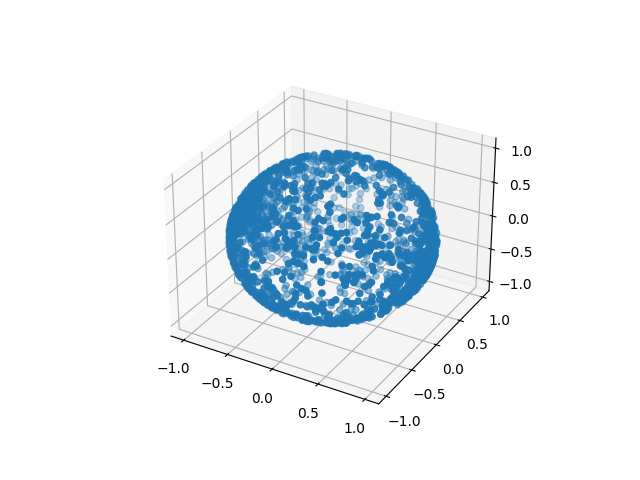

In [8]:
import matplotlib.pyplot as plt
[x,y,z] = list(zip(*unit_sphere_output))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

Test batch of NN outputs

In [9]:
exp_input = tf.random.uniform(shape=[2000,2,1],minval=-10,maxval=10)
out = _exp_map(exp_input)

In [11]:
import numpy as np

In [12]:
print(out.shape)
sphere_pts = out.numpy().squeeze()
print(np.linalg.norm(sphere_pts,axis=1))
print(np.mean(np.linalg.norm(sphere_pts,axis=1)))

(2000, 3, 1)
[1.         0.99999994 0.99999994 ... 0.99999964 0.9999999  0.9999999 ]
1.0


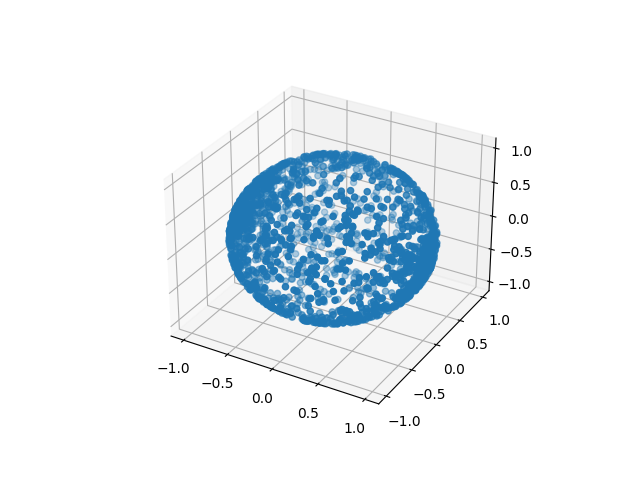

In [13]:
[x,y,z] = list(zip(*sphere_pts))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)